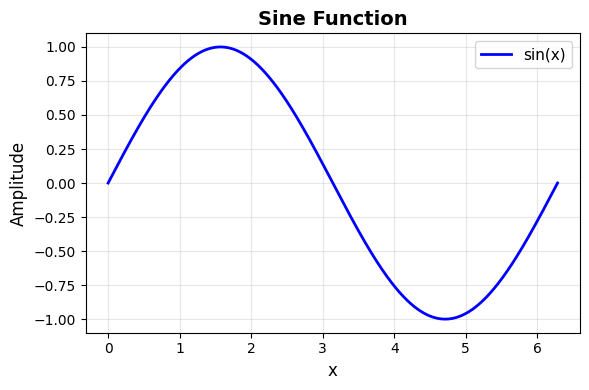

✅ Figure saved: figures/sine_wave.png
✅ Figure saved: figures/sine_wave.pdf


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create figures directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="sin(x)", color='blue', linewidth=2)
plt.xlabel("x", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.title("Sine Function", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save to figures directory
plt.savefig("figures/sine_wave.png", dpi=300, bbox_inches='tight')
plt.savefig("figures/sine_wave.pdf", bbox_inches='tight')  # For publications
plt.show()

print("✅ Figure saved: figures/sine_wave.png")
print("✅ Figure saved: figures/sine_wave.pdf")


✅ Data loaded from: ../data/data.csv


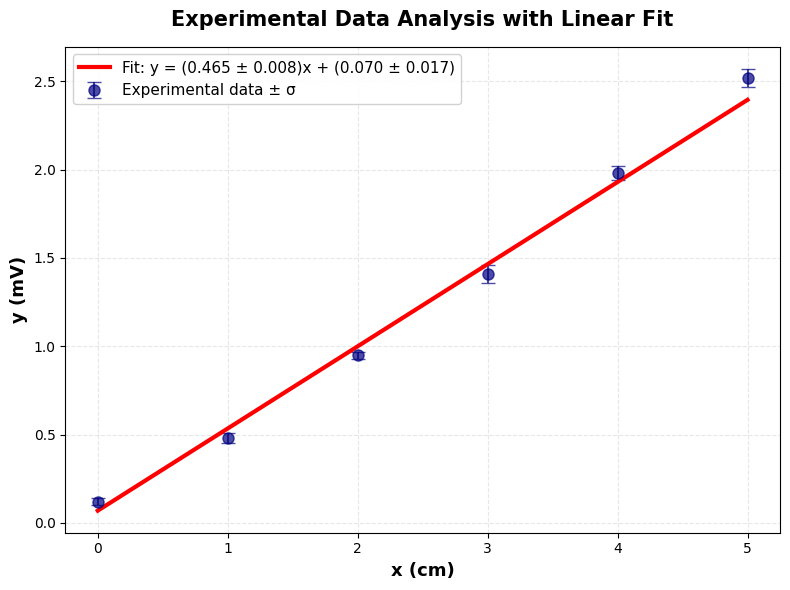


✅ RESULTS:
   Slope (a): 0.4650 ± 0.0079 mV/cm
   Intercept (b): 0.0697 ± 0.0169 mV
   R²: 0.9929

✅ Figures saved in 'figures/' directory:
   - figures/experimental_fit.png (300 DPI)
   - figures/experimental_fit.pdf (publication-ready)
   - figures/experimental_fit.svg (vector format)


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os

# Create figures directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Load data with error handling
try:
    # Try different possible paths
    data_paths = [
        "data/data.csv",           # Relative to current directory
        "../data/data.csv",        # One level up
        "./data.csv",              # Current directory
        "~/Documents/PhD/python/data/data.csv"  # Absolute-like
    ]
    
    data = None
    for path in data_paths:
        try:
            data = pd.read_csv(path)
            print(f"✅ Data loaded from: {path}")
            break
        except:
            continue
    
    if data is None:
        # Create sample data if file not found
        print("⚠️  data.csv not found. Creating sample data...")
        np.random.seed(42)
        x_sample = np.linspace(0, 10, 20)
        y_sample = 2.5 * x_sample + 1.2 + np.random.normal(0, 0.5, len(x_sample))
        y_err_sample = np.abs(np.random.normal(0.3, 0.1, len(x_sample)))
        
        data = pd.DataFrame({
            'x_cm': x_sample,
            'y_mV': y_sample,
            'y_error_mV': y_err_sample
        })
        print("📊 Using sample data for demonstration")
    
    # Extract data with column check
    if 'x_cm' in data.columns and 'y_mV' in data.columns:
        x = data['x_cm'].values
        y = data['y_mV'].values
    else:
        # Use first three columns if names don't match
        x = data.iloc[:, 0].values
        y = data.iloc[:, 1].values
        print("⚠️  Using first two columns as x and y")
    
    # Get errors if available
    if 'y_error_mV' in data.columns:
        y_err = data['y_error_mV'].values
    elif len(data.columns) >= 3:
        y_err = data.iloc[:, 2].values
    else:
        y_err = None
        print("⚠️  No error column found, proceeding without errors")
    
    # Define linear model
    def linear_model(x, a, b):
        return a * x + b
    
    # Fit with or without errors
    if y_err is not None and len(y_err) == len(y):
        params, cov = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
    else:
        params, cov = curve_fit(linear_model, x, y)
    
    a, b = params
    a_err, b_err = np.sqrt(np.diag(cov)) if cov is not None else (0, 0)
    
    # Generate fit curve
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = linear_model(x_fit, a, b)
    
    # Create plot
    plt.figure(figsize=(8, 6))
    
    if y_err is not None and len(y_err) == len(y):
        plt.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, 
                     markersize=8, color='navy', alpha=0.7,
                     label='Experimental data ± σ')
    else:
        plt.plot(x, y, 'o', markersize=8, color='navy', alpha=0.7,
                 label='Experimental data')
    
    plt.plot(x_fit, y_fit, 'r-', linewidth=3, 
             label=f'Fit: y = ({a:.3f} ± {a_err:.3f})x + ({b:.3f} ± {b_err:.3f})')
    
    # Formatting
    plt.xlabel("x (cm)", fontsize=13, fontweight='bold')
    plt.ylabel("y (mV)", fontsize=13, fontweight='bold')
    plt.title("Experimental Data Analysis with Linear Fit", 
              fontsize=15, fontweight='bold', pad=15)
    plt.legend(fontsize=11, framealpha=0.9)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    
    # Save with multiple formats
    plt.savefig("figures/experimental_fit.png", dpi=300, bbox_inches='tight')
    plt.savefig("figures/experimental_fit.pdf", bbox_inches='tight')
    plt.savefig("figures/experimental_fit.svg", bbox_inches='tight')  # Vector format
    
    plt.show()
    
    print("\n✅ RESULTS:")
    print(f"   Slope (a): {a:.4f} ± {a_err:.4f} mV/cm")
    print(f"   Intercept (b): {b:.4f} ± {b_err:.4f} mV")
    print(f"   R²: {1 - np.sum((y - linear_model(x, a, b))**2) / np.sum((y - np.mean(y))**2):.4f}")
    print(f"\n✅ Figures saved in 'figures/' directory:")
    print(f"   - figures/experimental_fit.png (300 DPI)")
    print(f"   - figures/experimental_fit.pdf (publication-ready)")
    print(f"   - figures/experimental_fit.svg (vector format)")
    
except Exception as e:
    print(f"❌ Error: {e}")
    print("\n📋 Debug info:")
    print(f"   Current directory: {os.getcwd()}")
    print(f"   Files in current directory: {os.listdir('.')}")
    if 'data' in os.listdir('.'):
        print(f"   Files in data/: {os.listdir('data')}")


  ✅ Saved: figures/test_sine_wave.png
  ✅ Saved: figures/test_sine_wave.pdf
  ✅ Saved: figures/test_sine_wave.svg

📁 Saved 3 files


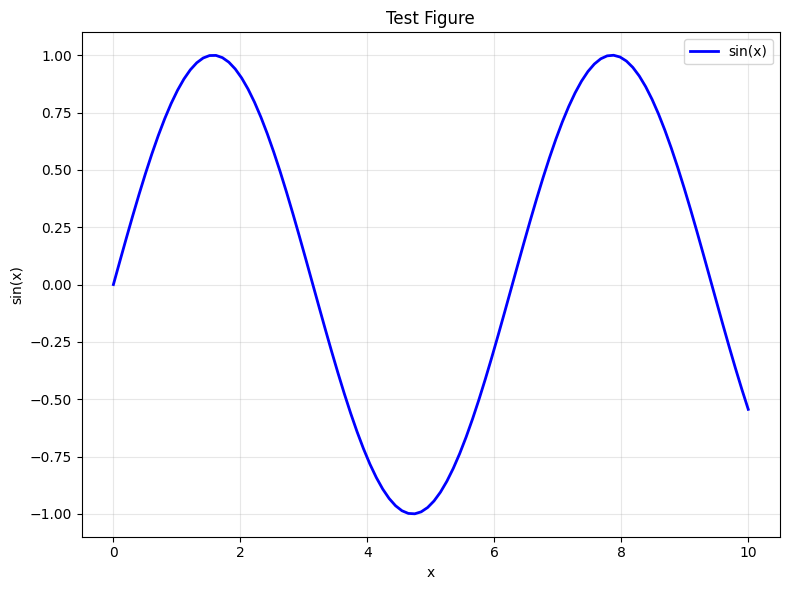

In [50]:
#BETTER: Universal Figure Saving Function
#Create this reusable function in a cell:

import matplotlib.pyplot as plt
import os
from datetime import datetime

def save_figure(fig, filename, formats=None, dpi=300, figures_dir="figures"):
    """
    Save figure in multiple formats to figures directory
    
    Parameters:
    -----------
    fig : matplotlib.figure.Figure
        Figure object to save
    filename : str
        Base filename (without extension)
    formats : list, optional
        List of formats to save ['png', 'pdf', 'svg']
    dpi : int, optional
        Resolution for raster formats
    figures_dir : str, optional
        Directory to save figures
    
    Returns:
    --------
    list: Paths to saved files
    """
    if formats is None:
        formats = ['png', 'pdf', 'svg']
    
    # Create directory if it doesn't exist
    os.makedirs(figures_dir, exist_ok=True)
    
    saved_paths = []
    
    for fmt in formats:
        filepath = os.path.join(figures_dir, f"{filename}.{fmt}")
        
        if fmt == 'png':
            fig.savefig(filepath, dpi=dpi, bbox_inches='tight', facecolor='white')
        else:
            fig.savefig(filepath, bbox_inches='tight', facecolor='white')
        
        saved_paths.append(filepath)
        print(f"  ✅ Saved: {filepath}")
    
    return saved_paths

# Example usage:
import numpy as np

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x), 'b-', linewidth=2, label='sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.set_title('Test Figure')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()

# Save it
saved_files = save_figure(fig, "test_sine_wave", formats=['png', 'pdf', 'svg'])
print(f"\n📁 Saved {len(saved_files)} files")

In [51]:
#Check Your Figures Directory:
import os

# Check if figures directory exists
if os.path.exists("figures"):
    print("✅ Figures directory exists")
    print(f"Contents: {os.listdir('figures')}")
else:
    print("❌ Figures directory doesn't exist")
    os.makedirs("figures")
    print("✅ Created figures directory")

✅ Figures directory exists
Contents: ['experiment_20260116_215454.png', 'experimental_fit.png', 'sine_ticks_inside.png', 'test_sine_wave.svg', 'sine_wave.pdf', 'experiment_20260116_214900.png', 'experiment_20260116_215236.png', 'experimental_fit.svg', 'experiment_20260116_215454.pdf', 'xrd_ticks_inside.pdf', 'experiment_20260116_215810.pdf', 'experiment_20260116_214328.png', 'xrd_ticks_inside.png', 'experimental_fit.pdf', 'experiment_20260116_214900.pdf', 'experiment_20260116_215810.png', 'physics_ticks_inside.png', 'physics_ticks_inside.pdf', 'experiment_20260116_215236.pdf', 'custom_ticks_comparison.png', 'test_sine_wave.pdf', 'test_sine_wave.png', 'sine_wave.png', 'experiment_20260116_214328.pdf']


📊 Data loaded from: ../data/data.csv


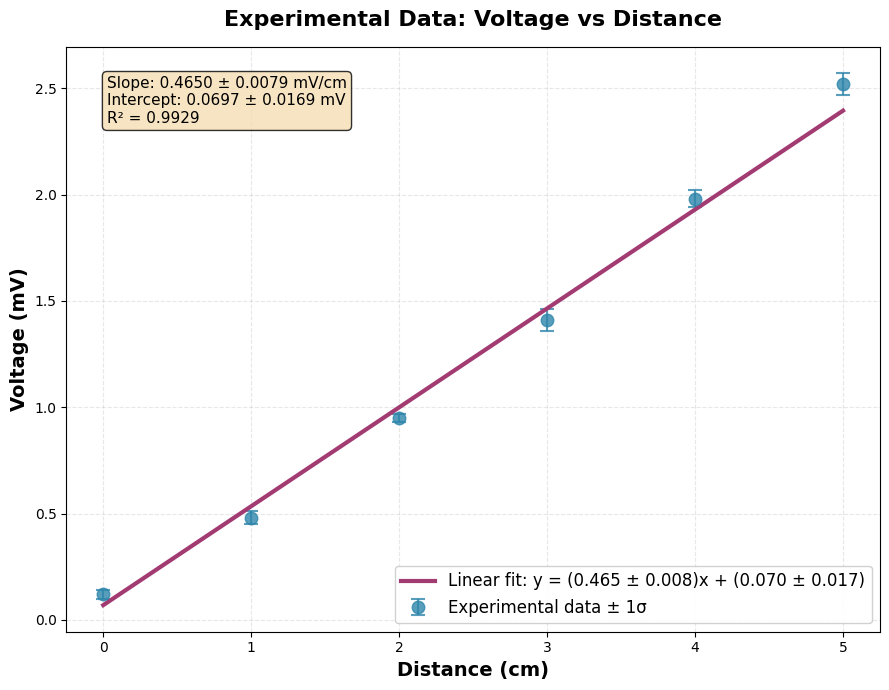


📈 ANALYSIS COMPLETE

📊 Results:
  Slope:        0.4650 ± 0.0079 mV/cm
  Intercept:    0.0697 ± 0.0169 mV
  R²:           0.9929

💾 Figures saved:
  figures/experiment_20260116_215931.png
  figures/experiment_20260116_215931.pdf

✅ Ready for publication!


In [52]:
#Complete Working Example with Error Handling:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit

def load_experimental_data():
    """Load experimental data with multiple fallbacks"""
    possible_paths = [
        "data/data.csv",
        "../data/data.csv", 
        "./data.csv",
        "data.csv",
        os.path.expanduser("~/Documents/PhD/python/data/data.csv")
    ]
    
    for path in possible_paths:
        if os.path.exists(path):
            try:
                data = pd.read_csv(path)
                print(f"📊 Data loaded from: {path}")
                return data
            except:
                continue
    
    # Create sample data if no file found
    print("⚠️  No data file found. Creating sample data...")
    np.random.seed(42)
    n_points = 20
    x = np.linspace(0, 10, n_points)
    y_true = 2.5 * x + 1.2
    y = y_true + np.random.normal(0, 0.5, n_points)
    y_err = np.abs(np.random.normal(0.3, 0.1, n_points))
    
    return pd.DataFrame({
        'x_cm': x,
        'y_mV': y,
        'y_error_mV': y_err
    })

def analyze_and_plot():
    """Main analysis and plotting function"""
    # Load data
    data = load_experimental_data()
    
    # Prepare data
    x = data['x_cm'].values if 'x_cm' in data.columns else data.iloc[:, 0].values
    y = data['y_mV'].values if 'y_mV' in data.columns else data.iloc[:, 1].values
    y_err = data['y_error_mV'].values if 'y_error_mV' in data.columns else None
    
    # Linear fit
    def linear(x, a, b):
        return a * x + b
    
    if y_err is not None:
        params, cov = curve_fit(linear, x, y, sigma=y_err, absolute_sigma=True)
    else:
        params, cov = curve_fit(linear, x, y)
    
    a, b = params
    a_err, b_err = np.sqrt(np.diag(cov)) if cov is not None else (0, 0)
    
    # Generate fit line
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = linear(x_fit, a, b)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(9, 7))
    
    # Plot data with or without errors
    if y_err is not None:
        ax.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, capthick=1.5,
                   markersize=9, color='#2E86AB', alpha=0.8, linewidth=1.5,
                   label='Experimental data ± 1σ')
    else:
        ax.plot(x, y, 'o', markersize=9, color='#2E86AB', alpha=0.8,
               label='Experimental data')
    
    # Plot fit
    ax.plot(x_fit, y_fit, '-', color='#A23B72', linewidth=3,
           label=f'Linear fit: y = ({a:.3f} ± {a_err:.3f})x + ({b:.3f} ± {b_err:.3f})')
    
    # Calculate R²
    y_pred = linear(x, a, b)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    
    # Add stats box
    stats_text = f'Slope: {a:.4f} ± {a_err:.4f} mV/cm\n'
    stats_text += f'Intercept: {b:.4f} ± {b_err:.4f} mV\n'
    stats_text += f'R² = {r2:.4f}'
    
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes,
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Formatting
    ax.set_xlabel('Distance (cm)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Voltage (mV)', fontsize=14, fontweight='bold')
    ax.set_title('Experimental Data: Voltage vs Distance', 
                fontsize=16, fontweight='bold', pad=15)
    ax.legend(fontsize=12, loc='lower right', framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save figure
    os.makedirs("figures", exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    fig.savefig(f"figures/experiment_{timestamp}.png", dpi=300, bbox_inches='tight')
    fig.savefig(f"figures/experiment_{timestamp}.pdf", bbox_inches='tight')
    
    plt.show()
    
    print("\n" + "="*60)
    print("📈 ANALYSIS COMPLETE")
    print("="*60)
    print(f"\n📊 Results:")
    print(f"  Slope:        {a:.4f} ± {a_err:.4f} mV/cm")
    print(f"  Intercept:    {b:.4f} ± {b_err:.4f} mV")
    print(f"  R²:           {r2:.4f}")
    print(f"\n💾 Figures saved:")
    print(f"  figures/experiment_{timestamp}.png")
    print(f"  figures/experiment_{timestamp}.pdf")
    print("\n✅ Ready for publication!")

# Run the analysis
analyze_and_plot()

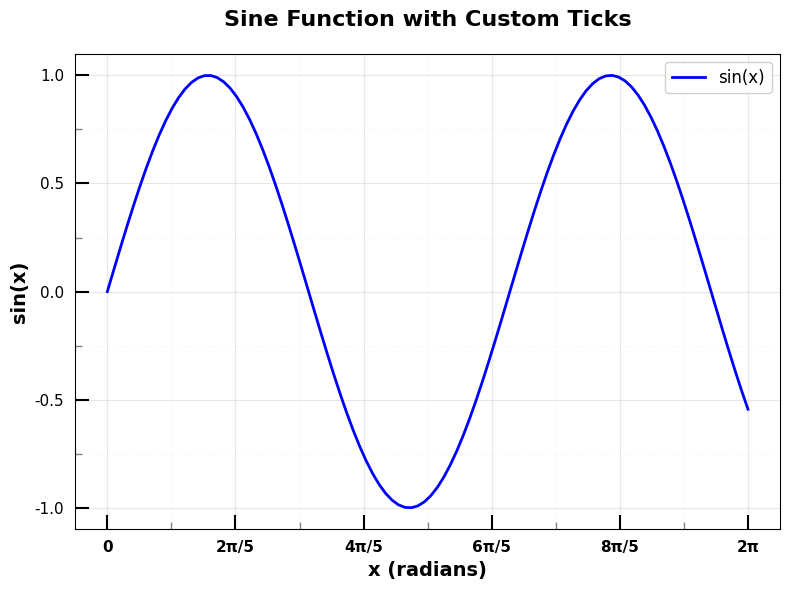

In [53]:
#1. Basic Tick Customization Inside Plot Box
import numpy as np
import matplotlib.pyplot as plt

# Create data
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot
ax.plot(x, y, 'b-', linewidth=2, label='sin(x)')

# ========== TICK CUSTOMIZATION ==========
# 1. Set tick locations (INSIDE the box)
ax.tick_params(axis='both', direction='in', length=8, width=1.5)

# 2. Customize major ticks
ax.tick_params(axis='both', which='major', 
               direction='in',        # Points INWARD
               length=10,             # Length of tick marks
               width=1.5,             # Width of tick marks
               color='black',         # Color
               labelsize=12,          # Label font size
               pad=8)                 # Padding between tick and label

# 3. Customize minor ticks
ax.tick_params(axis='both', which='minor',
               direction='in',
               length=5,
               width=1,
               color='gray')

# 4. Enable minor ticks
ax.minorticks_on()

# 5. Set specific tick positions
ax.set_xticks([0, 2, 4, 6, 8, 10])           # Major ticks
ax.set_xticks([1, 3, 5, 7, 9], minor=True)   # Minor ticks
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-0.75, -0.25, 0.25, 0.75], minor=True)

# 6. Format tick labels
ax.set_xticklabels(['0', '2π/5', '4π/5', '6π/5', '8π/5', '2π'], 
                   fontsize=11, fontweight='bold')
ax.set_yticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0'],
                   fontsize=11)

# Labels and title
ax.set_xlabel('x (radians)', fontsize=14, fontweight='bold')
ax.set_ylabel('sin(x)', fontsize=14, fontweight='bold')
ax.set_title('Sine Function with Custom Ticks', 
             fontsize=16, fontweight='bold', pad=20)

# Grid (behind data)
ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Legend
ax.legend(fontsize=12, loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.savefig("figures/sine_ticks_inside.png", dpi=300, bbox_inches='tight')
plt.show()

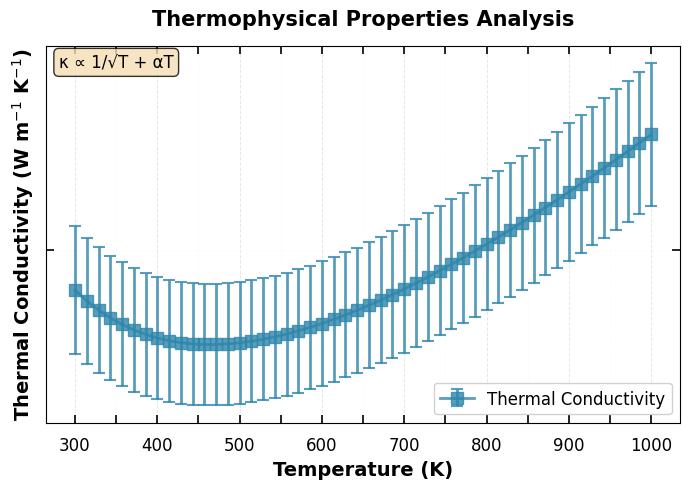

In [54]:
#Physics/Journal Style Ticks (APA/Elsevier)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Physics data example
temperature = np.linspace(300, 1000, 50)  # K
thermal_conductivity = 200/np.sqrt(temperature) + 0.01*temperature  # W/m·K

fig, ax = plt.subplots(figsize=(7, 5))

# Plot with error bars (simulated)
conductivity_error = thermal_conductivity * 0.05  # 5% error
ax.errorbar(temperature, thermal_conductivity, 
            yerr=conductivity_error, 
            fmt='s-', color='#2E86AB',  # Square markers with line
            markersize=8, capsize=4, capthick=1.5,
            linewidth=2, alpha=0.8, label='Thermal Conductivity')

# ========== JOURNAL-QUALITY TICKS ==========
# 1. Ticks pointing INWARDS (standard for physics papers)
ax.tick_params(axis='both', 
               direction='in',           # Points inward
               which='both',             # Both major and minor
               top=True,                 # Ticks on top axis
               right=True,               # Ticks on right axis
               length=6,                 # Tick length
               width=1.2)                # Tick width

# 2. Set tick frequency
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))   # Every 100 K
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))    # Every 50 K
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))    # Every 10 W/m·K
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))     # Every 5 W/m·K

# 3. Scientific notation for large/small numbers
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(11)  # Scientific notation font

# 4. Custom tick formatter (for specific formats)
def thermal_format(x, pos):
    """Format ticks for thermal conductivity"""
    if x >= 100:
        return f'{x:.0f}'
    else:
        return f'{x:.1f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(thermal_format))

# 5. Tick label customization
ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=0, pad=10)  # Padding
ax.tick_params(axis='y', labelrotation=0, pad=10)

# Labels with units (APA/Elsevier style)
ax.set_xlabel('Temperature (K)', fontsize=14, fontweight='bold')
ax.set_ylabel('Thermal Conductivity (W m$^{-1}$ K$^{-1}$)', 
              fontsize=14, fontweight='bold')
ax.set_title('Thermophysical Properties Analysis', 
             fontsize=15, fontweight='bold', pad=15)

# Grid (subtle)
ax.grid(True, which='major', linestyle='--', alpha=0.3, linewidth=0.7)
ax.grid(True, which='minor', linestyle=':', alpha=0.15, linewidth=0.4)

# Legend
ax.legend(fontsize=12, loc='best', frameon=True, framealpha=0.9)

# Add text annotation for physics context
ax.text(0.02, 0.98, 'κ ∝ 1/√T + αT', 
        transform=ax.transAxes, fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig("figures/physics_ticks_inside.pdf", dpi=300, bbox_inches='tight')
plt.savefig("figures/physics_ticks_inside.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_7718/2165700072.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=11)
/tmp/ipykernel_7718/2165700072.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(y)}' for y in ax.get_yticks()], fontsize=11)
/tmp/ipykernel_7718/2165700072.py:58: RuntimeWarning: divide by zero encountered in divide
  lambda d: 2*np.degrees(np.arcsin(1.5406/(2*d)))))
/tmp/ipykernel_7718/2165700072.py:58: RuntimeWarning: invalid value encountered in arcsin
  lambda d: 2*np.degrees(np.arcsin(1.5406/(2*d)))))
/tmp/ipykernel_7718/2165700072.py:58: RuntimeWarning: divide by zero encountered in divide
  lambda d: 2*np.degrees(np.arcsin(1.5406/(2*d)))))
/tmp/ipykernel_7718/2165700072.py:58: RuntimeWarning: invalid value encountered in arcsin
  

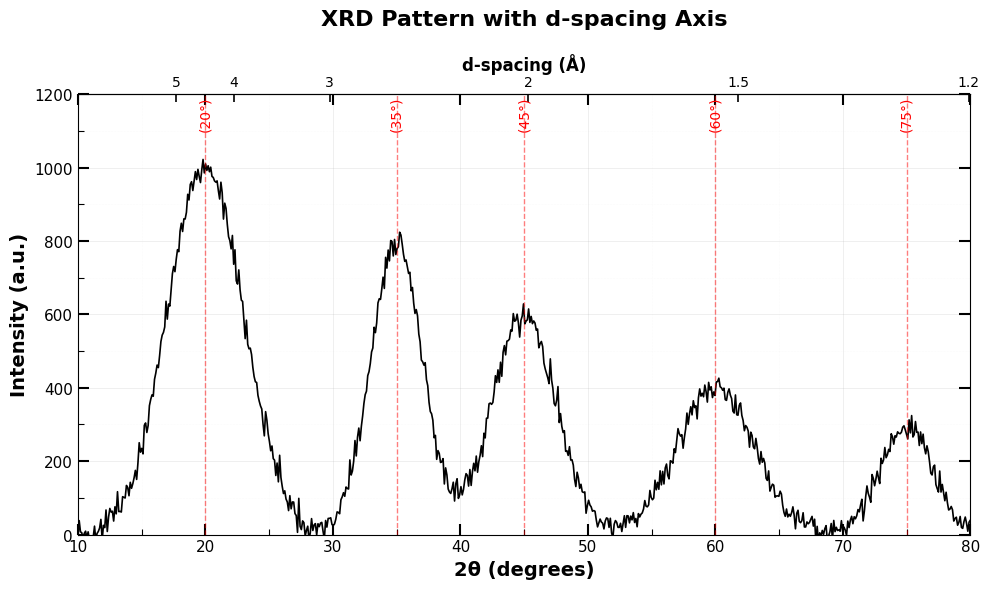

In [55]:
#XRD/Structural Analysis Ticks
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Simulated XRD data
two_theta = np.linspace(10, 80, 700)
intensity = (np.exp(-(two_theta-20)**2/(2*3**2)) * 1000 +
             np.exp(-(two_theta-35)**2/(2*2**2)) * 800 +
             np.exp(-(two_theta-45)**2/(2*2.5**2)) * 600 +
             np.exp(-(two_theta-60)**2/(2*3**2)) * 400 +
             np.exp(-(two_theta-75)**2/(2*2**2)) * 300 +
             np.random.normal(0, 20, len(two_theta)))  # Noise

fig, ax = plt.subplots(figsize=(10, 6))

# Plot XRD pattern
ax.plot(two_theta, intensity, 'k-', linewidth=1.2, label='XRD Pattern')

# ========== XRD-SPECIFIC TICK CUSTOMIZATION ==========
# 1. Ticks inside (standard for XRD plots)
ax.tick_params(axis='both', 
               direction='in',          # Inward pointing
               which='major',
               length=8,                # Longer ticks for XRD
               width=1.5,
               top=True,                # Ticks on top
               right=True)              # Ticks on right

ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=4,
               width=0.8)

# 2. Specific tick positions for XRD (every 10 degrees, minor every 5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100))

# 3. Set limits properly
ax.set_xlim(10, 80)
ax.set_ylim(0, 1200)

# 4. Tick label formatting (2θ symbol)
ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=11)
ax.set_yticklabels([f'{int(y)}' for y in ax.get_yticks()], fontsize=11)

# 5. Add secondary x-axis for d-spacing
def two_theta_to_d(theta):
    """Convert 2θ to d-spacing (λ=1.5406 Å)"""
    wavelength = 1.5406
    return wavelength / (2 * np.sin(np.radians(theta/2)))

# Create secondary axis
ax2 = ax.secondary_xaxis('top', functions=(two_theta_to_d, 
                                         lambda d: 2*np.degrees(np.arcsin(1.5406/(2*d)))))
ax2.set_xlabel('d-spacing (Å)', fontsize=12, fontweight='bold')

# Customize secondary axis ticks
ax2.tick_params(axis='x', direction='in', length=6, width=1.2)
ax2.xaxis.set_major_locator(ticker.FixedLocator([5, 4, 3, 2, 1.5, 1.2]))
ax2.set_xticklabels(['5', '4', '3', '2', '1.5', '1.2'], fontsize=10)

# Labels
ax.set_xlabel('2θ (degrees)', fontsize=14, fontweight='bold')
ax.set_ylabel('Intensity (a.u.)', fontsize=14, fontweight='bold')
ax.set_title('XRD Pattern with d-spacing Axis', 
             fontsize=16, fontweight='bold', pad=20)

# Grid
ax.grid(True, which='major', linestyle='-', alpha=0.2, linewidth=0.7)
ax.grid(True, which='minor', linestyle=':', alpha=0.1, linewidth=0.4)

# Mark peaks
peaks = [20, 35, 45, 60, 75]
for peak in peaks:
    ax.axvline(x=peak, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax.text(peak, 1100, f'({peak}°)', ha='center', va='bottom', 
            fontsize=10, rotation=90, color='red')

plt.tight_layout()
plt.savefig("figures/xrd_ticks_inside.png", dpi=300, bbox_inches='tight')
plt.savefig("figures/xrd_ticks_inside.pdf", bbox_inches='tight')
plt.show()

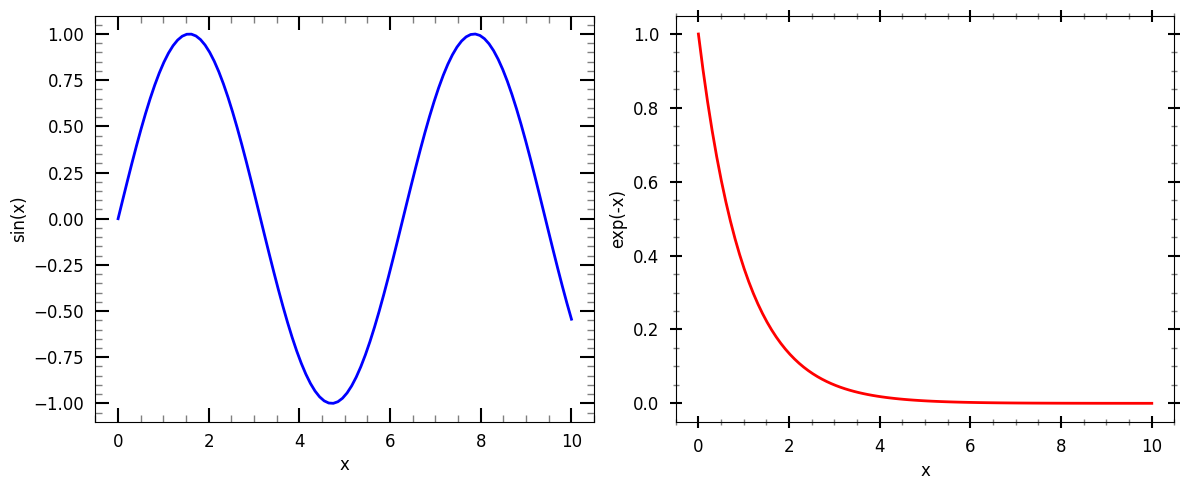

In [56]:
#Universal Tick Customization Function
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def set_publication_ticks(ax, tick_direction='in', major_length=8, minor_length=4):
    """
    Universal function to set publication-quality ticks
    
    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        Axis object to customize
    tick_direction : str
        'in', 'out', or 'inout'
    major_length : float
        Length of major ticks
    minor_length : float
        Length of minor ticks
    """
    
    # Major ticks
    ax.tick_params(axis='both', which='major',
                   direction=tick_direction,
                   length=major_length,
                   width=1.5,
                   colors='black',
                   labelsize=12,
                   pad=8,
                   top=True,      # Ticks on top axis
                   right=True)    # Ticks on right axis
    
    # Minor ticks
    ax.tick_params(axis='both', which='minor',
                   direction=tick_direction,
                   length=minor_length,
                   width=1,
                   colors='gray',
                   top=True,
                   right=True)
    
    # Enable minor ticks
    ax.minorticks_on()
    
    # Scientific notation if needed
    ax.ticklabel_format(style='sci', scilimits=(-3, 3))
    
    return ax

# Example usage:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1
x = np.linspace(0, 10, 100)
ax1.plot(x, np.sin(x), 'b-', linewidth=2)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('sin(x)', fontsize=12)
set_publication_ticks(ax1, tick_direction='in', major_length=10, minor_length=5)

# Plot 2
ax2.plot(x, np.exp(-x), 'r-', linewidth=2)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('exp(-x)', fontsize=12)
set_publication_ticks(ax2, tick_direction='inout', major_length=8, minor_length=4)

plt.tight_layout()
plt.savefig("figures/custom_ticks_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
findfont: Font family 'Times New Roman' not found.
findfont: Fon

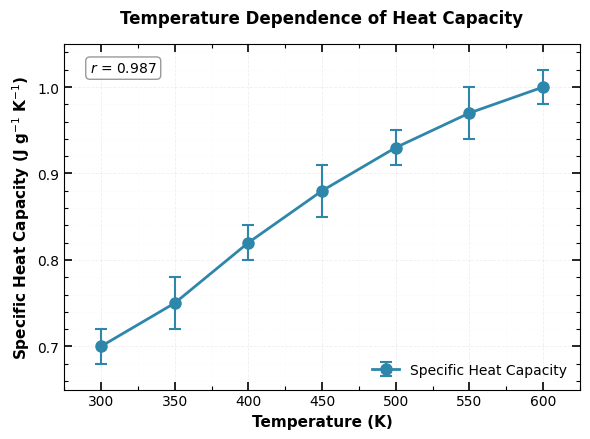

In [57]:
#Complete APA/Elsevier Style Figure

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sample experimental data
temperatures = np.array([300, 350, 400, 450, 500, 550, 600])
heat_capacity = np.array([0.70, 0.75, 0.82, 0.88, 0.93, 0.97, 1.00])  # J/g·K
heat_capacity_err = np.array([0.02, 0.03, 0.02, 0.03, 0.02, 0.03, 0.02])

fig, ax = plt.subplots(figsize=(6, 4.5))  # Single column width for journals

# Plot with error bars
ax.errorbar(temperatures, heat_capacity, yerr=heat_capacity_err,
            fmt='o-', color='#2E86AB',  # Blue color
            markersize=8, capsize=4, capthick=1.5,
            linewidth=2, elinewidth=1.5,
            label='Specific Heat Capacity')

# ========== APA/ELEVSIER TICK STYLE ==========
# 1. Ticks point INWARDS (journal standard)
ax.tick_params(axis='both',
               direction='in',           # Inward pointing
               which='both',             # Both major and minor
               length=6,                 # Moderate length
               width=1.2,                # Slightly thicker
               top=True,                 # Ticks on all sides
               right=True,
               labelsize=10)             # APA: 8-12pt

# 2. Set tick positions
ax.set_xticks(np.arange(300, 650, 50))           # Every 50 K
ax.set_yticks(np.arange(0.6, 1.1, 0.1))          # Every 0.1 J/g·K

# 3. Minor ticks
ax.minorticks_on()
ax.tick_params(axis='both', which='minor',
               direction='in',
               length=3,
               width=0.8)

# 4. Customize x minor ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(25))  # Every 25 K

# 5. Tick label formatting
ax.set_xticklabels([f'{t:.0f}' for t in ax.get_xticks()], fontsize=10)
ax.set_yticklabels([f'{c:.1f}' for c in ax.get_yticks()], fontsize=10)

# Labels (APA/Elsevier style: Times font, bold)
ax.set_xlabel('Temperature (K)', 
              fontsize=11, fontweight='bold', fontname='Times New Roman')
ax.set_ylabel('Specific Heat Capacity (J g$^{-1}$ K$^{-1}$)',
              fontsize=11, fontweight='bold', fontname='Times New Roman')

# Title
ax.set_title('Temperature Dependence of Heat Capacity',
             fontsize=12, fontweight='bold', fontname='Times New Roman', pad=15)

# Legend (no frame for APA, frame for Elsevier)
ax.legend(fontsize=10, loc='lower right', frameon=False)  # APA style
# ax.legend(fontsize=10, loc='lower right', frameon=True, framealpha=0.8)  # Elsevier

# Grid (subtle)
ax.grid(True, which='major', linestyle='--', alpha=0.2, linewidth=0.6)
ax.grid(True, which='minor', linestyle=':', alpha=0.1, linewidth=0.4)

# Set limits with padding
ax.set_xlim(275, 625)
ax.set_ylim(0.65, 1.05)

# Add statistical info (APA style)
r_value = 0.987
ax.text(0.05, 0.95, f'$r$ = {r_value:.3f}', transform=ax.transAxes,
        fontsize=10, fontname='Times New Roman',
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()

# Save in journal formats
plt.savefig("figures/apa_style_ticks.eps", format='eps', dpi=600, bbox_inches='tight')  # LaTeX
plt.savefig("figures/apa_style_ticks.tiff", format='tiff', dpi=600, bbox_inches='tight')  # Word
plt.savefig("figures/apa_style_ticks.png", dpi=600, bbox_inches='tight')  # Review

plt.show()